In [5]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from utils import build_dataset
from models import BiLSTM, Seq2Seq, lstm_model
from config import pred_time_steps, time_steps, n_features 

train = pd.read_csv("train.csv")
valid = train.iloc[-400:]

X_train, y_train = [], []
for i in range(1, 3):
    X, y = build_dataset(train[f'flow_{i}'])
    X_train.extend(X)
    y_train.extend(y)
X_train, y_train = np.array(X_train), np.array(y_train)
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1))

X_valid, y_valid = build_dataset(valid['flow_1'])
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], 1))
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(9410, 168, 1) (9410, 24, 1) (209, 168, 1) (209, 24, 1)


In [2]:
from tensorflow.keras.metrics import mape

model = lstm_model()
model.compile(optimizer='adam', loss='mse', metrics=['mape'])
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
148/148 [==============================] - 40s 246ms/step - loss: 534.0330 - mape: 114.1668 - val_loss: 488.5149 - val_mape: 51.7351
Epoch 2/20
148/148 [==============================] - 42s 287ms/step - loss: 347.9662 - mape: 90.8204 - val_loss: 383.1151 - val_mape: 59.8756
Epoch 3/20
148/148 [==============================] - 46s 308ms/step - loss: 323.6673 - mape: 82.4195 - val_loss: 374.9059 - val_mape: 58.9136
Epoch 4/20
148/148 [==============================] - 45s 304ms/step - loss: 299.0847 - mape: 74.5361 - val_loss: 313.1652 - val_mape: 52.5726
Epoch 5/20
148/148 [==============================] - 46s 311ms/step - loss: 217.5118 - mape: 53.4087 - val_loss: 147.7879 - val_mape: 28.3113
Epoch 6/20
148/148 [==============================] - 45s 304ms/step - loss: 113.4224 - mape: 27.1341 - val_loss: 79.3160 - val_mape: 20.7462
Epoch 7/20
148/148 [==============================] - 46s 310ms/step - loss: 93.6809 - mape: 22.4346 - val_loss: 104.0923 - val_mape: 26.6989


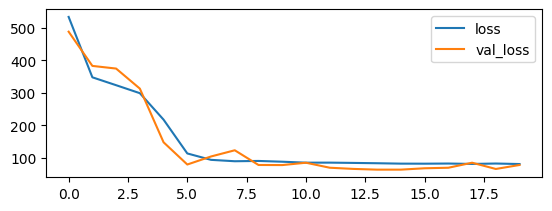

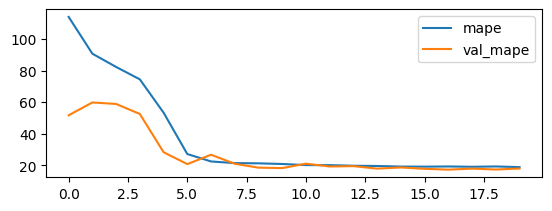

In [3]:
from matplotlib import pyplot as plt

loss, val_loss = history.history['loss'], history.history['val_loss']
mape, val_mape = history.history['mape'], history.history['val_mape']

plt.subplot(211)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

plt.subplot(212)
plt.plot(mape, label='mape')
plt.plot(val_mape, label='val_mape')
plt.legend()
plt.show()

mape: 13.65024185180664, msle: 0.055964741855859756, score: 0.9470013380050659


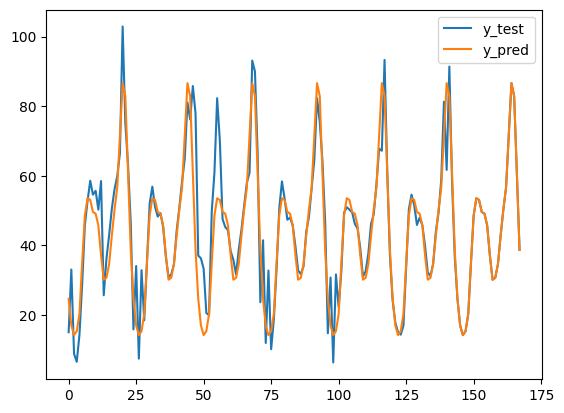

In [11]:
from tensorflow.keras.metrics import MAPE, MSLE
test = pd.read_csv("test.csv")
y_test = test['flow_1'].to_list()

inputs = test['flow_1'].values
inputs = np.reshape(inputs[-168:], (1, 168, 1))

y_pred = []
for i in range(7):
    pred = list(model.predict(inputs).flatten())
    y_pred.extend(pred)
    y_test = y_test[:-pred_time_steps] + pred

mape, msle = MAPE(y_test, y_pred), MSLE(y_test, y_pred)
score = 1 / (1 + msle)
print("mape: {}, msle: {}, score: {}".format(mape, msle, score))

plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()